# Introduction

In this Jupyter notebook, I will investigate the format of Riot API. 
By calling various API, stat for the given player will be given and with the stats, we will going to build different models in determining win or loss.

In [99]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Update this variable as the app_secret expires.

In [254]:
my_app_secret = ""

## Getting Account Info from the Riot API to match their summoner name

``` API Link: /lol/summoner/v3/summoners/by-name/{summonerName} ```

In [3]:
request = 'https://na1.api.riotgames.com/lol/summoner/v3/summoners/by-name/RiotSchmick?api_key='+my_app_secret

res = requests.get(request)

In [4]:
type(res.json())

dict

In [5]:
summoner_names = pd.read_csv('./lcs_player_2018.csv')['Player'].values

In [6]:
info = []
for name in summoner_names: 
    request = 'https://na1.api.riotgames.com/lol/summoner/v3/summoners/by-name/' + name + '?api_key='+my_app_secret
    info.append(requests.get(request).json())

In [7]:
info = pd.DataFrame.from_dict(info)

## Getting match history of the players recently

```API Link: /lol/match/v3/matchlists/by-account/{accountId}```

In [8]:
account_ids = info['accountId'].values

In [9]:
account_ids[0]

30130

In [10]:
request = 'https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/' + str(30130) +\
'/?api_key='+my_app_secret + '&season=11'

In [11]:
matches = []
for account in account_ids:
    request = 'https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/' + str(account) +\
'/?api_key='+my_app_secret + '&season=11' 
    matches.append(requests.get(request).json())

In [12]:
pd.DataFrame.from_dict(matches[0]['matches'])

,champion,gameId,lane,platformId,queue,role,season,timestamp
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198


matches[0]['matches'] --> account_ids[0]'s matches

In [13]:
df = pd.DataFrame(columns={'champion', 'gameID', 'lane', 'platformId', 'queue', 'role', 'season', 'timestamp'})

In [14]:
dictionary = []

In [15]:
player_num = []

In [16]:
j = 0 
for match in matches: 
    try: 
        a = match['matches']
        for i in a: 
            dictionary.append(i)
            player_num.append(account_ids[j])
        j+=1
    except:
        j+=1

In [17]:
len(player_num)

2208

In [18]:
len(dictionary)

2208

In [19]:
game_df = pd.DataFrame(dictionary)

In [20]:
game_df['player'] = player_num

In [21]:
game_df

,champion,gameId,lane,platformId,queue,role,season,timestamp,player
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328,30130
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033,30130
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072,30130
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526,30130
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198,30130
5,104,2728412837,JUNGLE,NA1,420,NONE,11,1519682617078,239603734
6,107,2728226316,JUNGLE,NA1,430,NONE,11,1519639405904,239603734
7,72,2723957818,JUNGLE,NA1,420,NONE,11,1519201697713,239603734
8,76,2721602084,JUNGLE,NA1,420,NONE,11,1518935956502,239603734
9,99,2744589562,BOTTOM,NA1,420,DUO_SUPPORT,11,1521614672371,469064


In [22]:
info.head()

,accountId,id,name,profileIconId,revisionDate,summonerLevel
0,30130,3267,Adrian,11,1516977351000,32
1,239603734,88669121,Akaadian,2087,1519685203000,44
2,166227,139388,Altec,18,1502768369000,30
3,32882990,20067790,AnDa,1153,1495783622000,30
4,469064,442232,aphromoo,3151,1521616446000,172


In [23]:
game_df.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328,30130
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033,30130
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072,30130
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526,30130
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198,30130


In [24]:
print (game_df.shape, info.shape)

(2208, 9) (56, 6)


In [25]:
game_df.rename(columns={'accounID': 'accountId'}, inplace=True)


In [26]:
game_df.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328,30130
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033,30130
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072,30130
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526,30130
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198,30130


In [27]:
df = game_df.merge(info, how='inner', right_on='accountId', left_on='player')

In [28]:
df.groupby('name').count()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,id,profileIconId,revisionDate,summonerLevel
name,,,,,,,,,,,,,,
Adrian,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Akaadian,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Apollo,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Arrow,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Biofrost,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Bjergsen,29,29,29,29,29,29,29,29,29,29,29,29,29,29
Cody Sun,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Contractz,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Damonte,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [29]:
df['role'].value_counts()

SOLO           761
DUO_SUPPORT    573
NONE           404
DUO_CARRY      328
DUO            142
Name: role, dtype: int64

In [30]:
stats = pd.read_csv('./lcs_player_2018.csv')

In [31]:
stats[stats['Pos']=='Jungle']

,Unnamed: 0,Player,Team,Pos,GP,W%,K,D,A,KDA,KP,DTH%,FB%,GD10,XPD10,CS-D10,CSPM
1,1,Akaadian,OpTic Gaming,Jungle,18,28%,21,33,84,3.2,68.2%,16.7%,50%,75,81,0.7,4.9
3,3,AnDa,FlyQuest,Jungle,16,38%,17,39,99,3.0,79.5%,21.2%,25%,-80,-197,-4.6,5.1
10,10,Contractz,Golden Guardians,Jungle,18,22%,27,56,86,2.0,72.4%,25.6%,28%,-211,-195,-3.8,4.9
12,12,Dardoch,Echo Fox,Jungle,19,63%,39,38,139,4.7,73.3%,17.9%,47%,152,107,1.4,5.0
32,32,LirA,Clutch Gaming,Jungle,20,55%,22,34,96,3.5,69.0%,22.7%,20%,-267,-102,0.4,5.4
35,35,Meteos,100 Thieves,Jungle,19,68%,24,30,122,4.9,76.0%,19.4%,63%,83,55,0.2,5.0
36,36,MikeYeung,Team SoloMid,Jungle,20,65%,27,38,132,4.2,72.6%,24.7%,50%,48,-16,0.2,5.0
42,42,Reignover,Counter Logic Gaming,Jungle,18,39%,18,43,120,3.2,73.4%,20.3%,61%,105,159,1.7,4.9
44,44,Shrimp,FlyQuest,Jungle,2,0%,1,10,5,0.6,60.0%,30.3%,0%,-307,-219,-4.5,4.5
51,51,Svenskeren,Cloud9,Jungle,20,60%,33,53,135,3.2,75.3%,25.4%,40%,153,132,3.1,5.3


## Look at per team

Now that we got the matches for the players, we can pick one as an example to investigate. 

#### Team Liquid

In [32]:
team_liquid = stats[stats['Team']=='Team Liquid']

In [33]:
team_liquid_players = team_liquid['Player'].values

In [34]:
team_liquid_matches = df[df['name'].isin(team_liquid_players)]

Famous Example: the ADC of Team Liquid, **DoubleLift**

In [35]:
doubleLift = team_liquid_matches[(team_liquid_matches['name']== team_liquid_players[0]) & (team_liquid_matches['lane']=='BOTTOM')]

In [36]:
doubleLift['champion'].value_counts()

18     13
96      9
498     9
51      9
145     5
222     5
81      5
110     4
236     4
22      3
429     3
67      2
44      2
119     1
53      1
201     1
223     1
267     1
Name: champion, dtype: int64

### Get if the game is won or not. So we get the win percentage for each player.

```API Link: /lol/match/v3/matches/{matchId}```

In [37]:
domain = "https://na1.api.riotgames.com"

In [38]:
def getParticipantID(a, summonerName): 
    try:
        participantID = 0 

        particpants = a['participantIdentities']

        for participant in participants:
            player = participant['player']
            if (player['summonerName'] == summonerName):
                participantID = participant['participantId']
    except:
        participant = np.nan
    return participantID

In [39]:
def has_Won(match, participantID):
    try:
        info = match['participants'][participantID-1]
        won = info['stats']['win']
    except:
        won = np.nan
    return won

#### Now that we have basic functions setup, lets loop through all the matches Doublelift has done

In [40]:
doubleLift.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,id,name,profileIconId,revisionDate,summonerLevel
878,22,2742854136,BOTTOM,NA1,420,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
880,81,2741910370,BOTTOM,NA1,420,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
881,145,2740513625,BOTTOM,NA1,420,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
882,145,2740504299,BOTTOM,NA1,420,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
883,145,2740471304,BOTTOM,NA1,420,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,3270,1521402193000,69


In [58]:
DL_matches = []

In [63]:
for match_num in doubleLift['gameId']:
#     match_request = domain + '/lol/match/v3/matches/' + str(match_num) +"?api_key=" + my_app_secret
    
    a = domain + '/lol/match/v3/matches/' + str(match_num) +"?api_key=" + my_app_secret
    match = requests.get(a).json()
    DL_matches.append(match)
    participantID = getParticipantID(a=match, summonerName='Doublelift')


## Loading up the static data from Riot API

Some static data includes champion list, item list,..
In this case we wil import champion list to match with the championId played by Doubelift.

In [74]:
champion_request = domain + '/lol/static-data/v3/champions/?api_key=' + my_app_secret

In [75]:
champion_df = pd.DataFrame(requests.get(champion_request).json()['data']).T

In [79]:
doubleLift.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,id,name,profileIconId,revisionDate,summonerLevel,Won
878,Ashe,2742854136,BOTTOM,NA1,420,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
880,Ezreal,2741910370,BOTTOM,NA1,420,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
881,Kai'Sa,2740513625,BOTTOM,NA1,420,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,True
882,Kai'Sa,2740504299,BOTTOM,NA1,420,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,True
883,Kai'Sa,2740471304,BOTTOM,NA1,420,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False


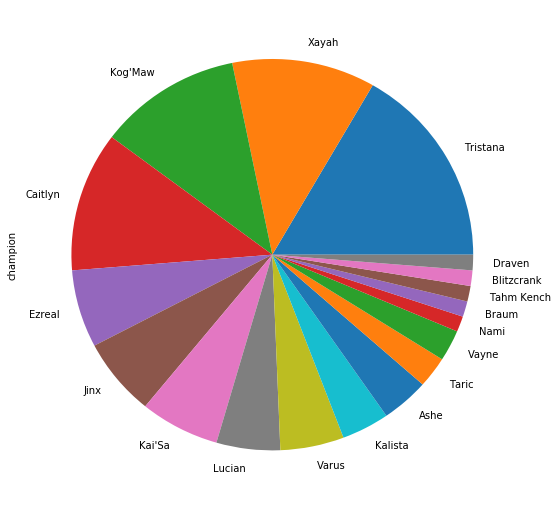

In [80]:
plt.figure(figsize=(9,9))
doubleLift['champion'].value_counts().plot.pie()

In [81]:
doubleLift.groupby('champion')['Won'].mean().sort_values(ascending=False)

champion
Blitzcrank    1.000000
Braum         1.000000
Taric         1.000000
Nami          1.000000
Lucian        0.750000
Kalista       0.666667
Jinx          0.600000
Caitlyn       0.555556
Xayah         0.555556
Tristana      0.461538
Kai'Sa        0.400000
Kog'Maw       0.333333
Ezreal        0.200000
Vayne         0.000000
Draven        0.000000
Tahm Kench    0.000000
Varus         0.000000
Ashe          0.000000
Name: Won, dtype: float64

In [82]:
doubleLift.columns

Index(['champion', 'gameId', 'lane', 'platformId', 'queue', 'role', 'season',
       'timestamp', 'player', 'accountId', 'id', 'name', 'profileIconId',
       'revisionDate', 'summonerLevel', 'Won'],
      dtype='object')

In [83]:
doubleLift.groupby('role')['Won'].mean()

role
DUO_CARRY      0.422535
DUO_SUPPORT    0.833333
SOLO           0.000000
Name: Won, dtype: float64

In [84]:
doubleLift.groupby('role')['Won'].count()

role
DUO_CARRY      71
DUO_SUPPORT     6
SOLO            1
Name: Won, dtype: int64

In [85]:
win_rate = pd.DataFrame([doubleLift.groupby('role')['Won'].count(),doubleLift.groupby('role')['Won'].mean()],\
                        index=['Games Played', 'Win Rate']).T
win_rate

,Games Played,Win Rate
role,,
DUO_CARRY,71.0,0.422535
DUO_SUPPORT,6.0,0.833333
SOLO,1.0,0.000000


In [91]:
durations = []
for match in DL_matches:
    durations.append(match['gameDuration'])

In [92]:
doubleLift['game_duration'] = durations

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Importing info about masteries/runes

In [124]:
masteries_rune = pd.DataFrame(json)

In [266]:
masteries_rune.to_csv('masteries_rune.csv', index=False)

In [132]:
masteries_rune.head()

,endOfGameStatDescs,iconPath,id,longDesc,name,shortDesc,tooltip
0,[Total damage: @eogvar1@],/lol-game-data/assets/v1/perk-images/Styles/Do...,8126,Damaging champions with <b>impaired movement o...,Cheap Shot,Deal bonus true damage to enemy champions with...,Damaging champions with <b>impaired movement o...
1,[],/lol-game-data/assets/v1/perk-images/Styles/Ru...,8415,+130 Health,The Arcane Colossus,<pathBonus><pathResolve>Resolve</pathResolve> ...,<pathResolve>Resolve</pathResolve> + <pathSorc...
2,[Total Bonus Damage: @eogvar1@],/lol-game-data/assets/v1/perk-images/Styles/Pr...,8017,Deal 4% more damage to champions with 150 more...,Cut Down,Deal more damage to champions with more max he...,Deal 4% more damage to champions with 150 more...
3,[Total Healing: @eogvar1@],/lol-game-data/assets/v1/perk-images/Styles/Do...,8139,Heal when you damage an enemy champion.<br><br...,Taste of Blood,Heal when you damage an enemy champion.,Heal when you damage an enemy champion.<br><br...
4,"[Total Damage: @eogvar1@, Bonus Damage: @eogva...",/lol-game-data/assets/v1/perk-images/Styles/Pr...,8005,Hitting an enemy champion with 3 consecutive b...,Press the Attack,Hitting an enemy champion 3 consecutive times ...,Hitting an enemy champion with 3 consecutive b...


In [ ]:
precision = []

In [131]:
masteries_rune[masteries_rune['name'] == 'Precision']

,endOfGameStatDescs,iconPath,id,longDesc,name,shortDesc,tooltip


## Adding more column to player's DataFrame

In [134]:
doubleLift.columns

Index(['champion', 'gameId', 'lane', 'platformId', 'queue', 'role', 'season',
       'timestamp', 'player', 'accountId', 'id', 'name', 'profileIconId',
       'revisionDate', 'summonerLevel', 'Won', 'game_duration'],
      dtype='object')

We will now add more about the stats of the game. 
Stats of the game includes: K, D, A, #CS, totalDamageDone, Masteries(6 Masteries: primary(4), secondary(2))

In [141]:
DL_matches[0]['participants'][0]['stats']

{'championId': 27,
 'highestAchievedSeasonTier': 'PLATINUM',
 'participantId': 1,
 'spell1Id': 6,
 'spell2Id': 12,
 'stats': {'assists': 10,
  'champLevel': 14,
  'combatPlayerScore': 0,
  'damageDealtToObjectives': 3026,
  'damageDealtToTurrets': 2244,
  'damageSelfMitigated': 29428,
  'deaths': 4,
  'doubleKills': 1,
  'firstBloodAssist': False,
  'firstBloodKill': False,
  'firstInhibitorAssist': True,
  'firstInhibitorKill': False,
  'firstTowerAssist': False,
  'firstTowerKill': False,
  'goldEarned': 10410,
  'goldSpent': 9000,
  'inhibitorKills': 0,
  'item0': 1082,
  'item1': 2033,
  'item2': 3116,
  'item3': 3047,
  'item4': 3742,
  'item5': 3211,
  'item6': 3340,
  'killingSprees': 1,
  'kills': 5,
  'largestCriticalStrike': 0,
  'largestKillingSpree': 3,
  'largestMultiKill': 2,
  'longestTimeSpentLiving': 351,
  'magicDamageDealt': 95101,
  'magicDamageDealtToChampions': 14767,
  'magicalDamageTaken': 10729,
  'neutralMinionsKilled': 0,
  'neutralMinionsKilledEnemyJungle': 

In [159]:
def getParticipantID(a, summonerName): 
    try:
        participantID = 0
        particpants = a['participantIdentities']

        for participant in participants:
            player = participant['player']
            if (player['summonerName'] == summonerName):
                participantID = participant['participantId']
                print(participantID)
    except:
        participant = np.nan
    return participantID

In [150]:
ddfda = DL_matches[0]['participantIdentities']
for gg in ddfda:
    if(gg['player']['summonerName']== 'Doublelift'):
        print(gg['participantId'])

5


In [164]:
DL_PID = []
for match in DL_matches:
    participants = match['participantIdentities']
    for participant in participants:
        if (participant['player']['summonerName']=='Doublelift'):
            DL_PID.append(participant['participantId'])

In [165]:
len(DL_PID)

78

In [166]:
doubleLift['PID'] = DL_PID

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Adding more data to Doublelift.


In [210]:
# these variables will later be set to columns in the dataFrame
k = []
d = []
a = []
totalDamage = []
primary_mastery_0 = []
primary_mastery_1 = []
primary_mastery_2 = []
primary_mastery_3 = []
secondary_mastery_0 = []
secondary_mastery_1 = []
win = []
game_id = []

for i, match in enumerate(DL_matches): 
    ## getting pid from each cells in the player's PID column 
    pid = doubleLift['PID'][i]
    ## Looking at the stats of the player in each game
    info = match['participants'][pid-1]['stats']
    
    ## Start appending the information
    game_id.append(match['gameId'])
    win.append(info['win'])
    k.append(info['kills'])
    a.append(info['assists'])
    d.append(info['deaths'])
    totalDamage.append(info['totalDamageDealtToChampions'])
    primary_mastery_0.append(info['perk0'])
    primary_mastery_1.append(info['perk1'])
    primary_mastery_2.append(info['perk2'])
    primary_mastery_3.append(info['perk3'])
    secondary_mastery_0.append(info['perk4'])
    secondary_mastery_1.append(info['perk5'])

In [212]:
doubleLift['primary_mastery_0'] = primary_mastery_0

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
doubleLift.primary_mastery_0.value_counts()

8021    53
8005    10
8359     5
8008     3
8465     3
8439     1
8128     1
8351     1
8214     1
Name: primary_mastery_0, dtype: int64

In [221]:
doubleLift['k'] = k
doubleLift['d'] = d
doubleLift['a'] = a

doubleLift['totalDamage'] = totalDamage
doubleLift['primary_mastery_0'] = primary_mastery_0
doubleLift['primary_mastery_1'] = primary_mastery_1
doubleLift['primary_mastery_2'] = primary_mastery_2
doubleLift['primary_mastery_3'] = primary_mastery_3
doubleLift['secondary_mastery_0'] = secondary_mastery_0
doubleLift['secondary_mastery_1'] = secondary_mastery_1

doubleLift['win'] = win
doubleLift['supplementary'] = game_id
doubleLift.head()

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,...,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win,supplementary
0,Ashe,2742854136,BOTTOM,NA1,420,DUO_CARRY,11,1521400621699,32971449,32971449,...,3,6,26030,9101,9103,8017,8233,8236,True,2742854136
1,Ezreal,2741910370,BOTTOM,NA1,420,DUO_CARRY,11,1521261248158,32971449,32971449,...,0,5,18654,8304,8345,8347,8236,8226,False,2741910370
2,Kai'Sa,2740513625,BOTTOM,NA1,420,DUO_CARRY,11,1521088298022,32971449,32971449,...,0,4,13937,9101,9104,8017,8233,8236,True,2740513625
3,Kai'Sa,2740504299,BOTTOM,NA1,420,DUO_CARRY,11,1521085913483,32971449,32971449,...,1,2,20078,9101,9103,8017,8233,8236,True,2740504299
4,Kai'Sa,2740471304,BOTTOM,NA1,420,DUO_CARRY,11,1521082752299,32971449,32971449,...,7,8,65888,9101,9103,8017,8233,8236,True,2740471304


In [223]:
doubleLift.drop(['queue', 'supplementary', 'platformId'], axis=1, inplace=True)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [228]:
doubleLift.drop('Won', axis=1, inplace=True)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [229]:
doubleLift.head()

,champion,gameId,lane,role,season,timestamp,player,accountId,id,name,...,k,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win
0,Ashe,2742854136,BOTTOM,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,...,8,3,6,26030,9101,9103,8017,8233,8236,True
1,Ezreal,2741910370,BOTTOM,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,...,2,0,5,18654,8304,8345,8347,8236,8226,False
2,Kai'Sa,2740513625,BOTTOM,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,...,9,0,4,13937,9101,9104,8017,8233,8236,True
3,Kai'Sa,2740504299,BOTTOM,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,...,8,1,2,20078,9101,9103,8017,8233,8236,True
4,Kai'Sa,2740471304,BOTTOM,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,...,16,7,8,65888,9101,9103,8017,8233,8236,True


In [232]:
doubleLift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 26 columns):
champion               78 non-null object
gameId                 78 non-null int64
lane                   78 non-null object
role                   78 non-null object
season                 78 non-null int64
timestamp              78 non-null int64
player                 78 non-null int64
accountId              78 non-null int64
id                     78 non-null int64
name                   78 non-null object
profileIconId          78 non-null int64
revisionDate           78 non-null int64
summonerLevel          78 non-null int64
game_duration          78 non-null int64
PID                    78 non-null int64
primary_mastery_0      78 non-null int64
k                      78 non-null int64
d                      78 non-null int64
a                      78 non-null int64
totalDamage            78 non-null int64
primary_mastery_1      78 non-null int64
primary_mastery_2      78 non-nu

In [236]:
doubleLift['k'][0]

8

In [239]:
def calculateKDA(row): 
    ka = row['k'] + row['a']
    if (row['d']==0):
        return ka
    else:
        return (ka /row['d'])

In [241]:
doubleLift['KDA'] = doubleLift.apply(calculateKDA, axis=1)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
doubleLift.head()

,champion,gameId,lane,role,season,timestamp,player,accountId,id,name,...,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win,KDA
0,Ashe,2742854136,BOTTOM,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,...,3,6,26030,9101,9103,8017,8233,8236,True,4.666667
1,Ezreal,2741910370,BOTTOM,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,...,0,5,18654,8304,8345,8347,8236,8226,False,7.000000
2,Kai'Sa,2740513625,BOTTOM,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,...,0,4,13937,9101,9104,8017,8233,8236,True,13.000000
3,Kai'Sa,2740504299,BOTTOM,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,...,1,2,20078,9101,9103,8017,8233,8236,True,10.000000
4,Kai'Sa,2740471304,BOTTOM,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,...,7,8,65888,9101,9103,8017,8233,8236,True,3.428571


In [244]:
doubleLift.drop('player', inplace=True, axis=1)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [245]:
doubleLift.head()

,champion,gameId,lane,role,season,timestamp,accountId,id,name,profileIconId,...,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win,KDA
0,Ashe,2742854136,BOTTOM,DUO_CARRY,11,1521400621699,32971449,20132258,Doublelift,3270,...,3,6,26030,9101,9103,8017,8233,8236,True,4.666667
1,Ezreal,2741910370,BOTTOM,DUO_CARRY,11,1521261248158,32971449,20132258,Doublelift,3270,...,0,5,18654,8304,8345,8347,8236,8226,False,7.000000
2,Kai'Sa,2740513625,BOTTOM,DUO_CARRY,11,1521088298022,32971449,20132258,Doublelift,3270,...,0,4,13937,9101,9104,8017,8233,8236,True,13.000000
3,Kai'Sa,2740504299,BOTTOM,DUO_CARRY,11,1521085913483,32971449,20132258,Doublelift,3270,...,1,2,20078,9101,9103,8017,8233,8236,True,10.000000
4,Kai'Sa,2740471304,BOTTOM,DUO_CARRY,11,1521082752299,32971449,20132258,Doublelift,3270,...,7,8,65888,9101,9103,8017,8233,8236,True,3.428571


In [261]:
for participant in DL_matches[2]['participants']:
    print(particpnat_

100
100
100
100
100
200
200
200
200
200


In [265]:
DL_matches[0]['participants'][0]['timeline']['lane']

'TOP'

In [255]:
doubleLift.to_csv('Example_doublelift.csv',index=False)

### We have gotten some of the information of the player we are looking at

Now that we have basic info from each match of the player, we will investigate the general matchup more. Such as who was going against whom, and which champion the player was playing aginst. 

There are many ways to approach this that I have thought of in comparing the match. 
    1. Player v all the oppponents (by their summonerName | summonerId)
    2. Player v opponent of the same position
        - Ex) TOP : TOP, MIDDLE : MIDDLE, ....
        - If the Player is bot, compare against the combination of bot duo of both adverse team and opposing team

We will start out with case 1 start (stated above).
To accomplish this, I will make a dictionary of a match that is in the format of :

```python '{playerName}OpponentsDict' = {'matchNum': {'Opponents': ['champ1', 'id1'], ...}, {'Team': ['champ1', 'id1']...}}```

In [270]:
doubleLift.drop(['profileIconId', 'summonerLevel', 'revisionDate'], axis=1, inplace=True)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [271]:
doubleLift.columns

Index(['champion', 'gameId', 'lane', 'role', 'season', 'timestamp',
       'accountId', 'id', 'name', 'game_duration', 'PID', 'primary_mastery_0',
       'k', 'd', 'a', 'totalDamage', 'primary_mastery_1', 'primary_mastery_2',
       'primary_mastery_3', 'secondary_mastery_0', 'secondary_mastery_1',
       'win', 'KDA'],
      dtype='object')

In [272]:
len(DL_PID)

78

In [273]:
doubleLift.shape

(78, 23)

In [274]:
doubleLift['PID'] = DL_PID

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
doubleLift.head()

,champion,gameId,lane,role,season,timestamp,accountId,id,name,game_duration,...,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win,KDA
0,Ashe,2742854136,BOTTOM,DUO_CARRY,11,1521400621699,32971449,20132258,Doublelift,1508,...,3,6,26030,9101,9103,8017,8233,8236,True,4.666667
1,Ezreal,2741910370,BOTTOM,DUO_CARRY,11,1521261248158,32971449,20132258,Doublelift,1624,...,0,5,18654,8304,8345,8347,8236,8226,False,7.000000
2,Kai'Sa,2740513625,BOTTOM,DUO_CARRY,11,1521088298022,32971449,20132258,Doublelift,1323,...,0,4,13937,9101,9104,8017,8233,8236,True,13.000000
3,Kai'Sa,2740504299,BOTTOM,DUO_CARRY,11,1521085913483,32971449,20132258,Doublelift,1522,...,1,2,20078,9101,9103,8017,8233,8236,True,10.000000
4,Kai'Sa,2740471304,BOTTOM,DUO_CARRY,11,1521082752299,32971449,20132258,Doublelift,2739,...,7,8,65888,9101,9103,8017,8233,8236,True,3.428571


How do we know if the player is in the opposing team or adversing team? 

The participants 1-5 (inclusive) are in team 1, and 6-10 (inclusive) are in team 2. Refer to PID column in the DataFrame.
So check the team and if they are a match, they are not an opposing team.

In [314]:
team1 = [0,1,2,3,4]
team2 = [5,6,7,8,9]
# Looping through to see which team the player was in. 
totalOpponents = {}
for i, matches in enumerate(DL_matches): 
    
    playerPID = doubleLift.PID[i]
    playerLane = matches['participants'][playerPID-1]['timeline']['lane']
    playerRole = matches['participants'][playerPID-1]['timeline']['role']
    
    # eachMatch will be added to totalOpponents
    eachMatch = {}
    
    if (playerPID < 6): 
        
        ## case when player in team 1
        ## To find the opponent, loop through the Participant Number 6-10 to find matching role
        
        for opp in team2: 
            # We need a pre-condition before to identify two 'bottom' lanes
            # We have to identify each lane: ADC and Support  
            # We can do this by the 'role' data in the dictionary 
            if (playerLane == 'BOTTOM'):
    
                if ((matches['participants'][opp]['timeline']['lane'] == playerLane) & (matches['participants'][opp]['timeline']['role'] == playerRole)):
                
                    eachMatch['Champion'] = matches['participants'][opp]['championId']
                    eachMatch['OpponentId'] = matches['participantIdentities'][opp]['player']['summonerName']
                    eachMatch['lane'] = matches['participants'][opp]['timeline']['lane']
                    eachMatch['role'] = matches['participants'][opp]['timeline']['role']
            else:
                if (matches['participants'][opp]['timeline']['lane'] == playerLane):
                
                    eachMatch['Champion'] = matches['participants'][opp]['championId']
                    eachMatch['OpponentId'] = matches['participantIdentities'][opp]['player']['summonerName']
                    eachMatch['lane'] = matches['participants'][opp]['timeline']['lane']
                    eachMatch['role'] = matches['participants'][opp]['timeline']['role']
                
    else:
        ## case when player in team 2
        ## To find the opponent, loop through the Participant Number 6-10 to find matching role

        for opp in team1: 
            
            if (playerLane == 'BOTTOM'):
    
                if ((matches['participants'][opp]['timeline']['lane'] == playerLane) & (matches['participants'][opp]['timeline']['role'] == playerRole)):
                
                    eachMatch['Champion'] = matches['participants'][opp]['championId']
                    eachMatch['OpponentId'] = matches['participantIdentities'][opp]['player']['summonerName']
                    eachMatch['lane'] = matches['participants'][opp]['timeline']['lane']
                    eachMatch['role'] = matches['participants'][opp]['timeline']['role']
            else:
                if (matches['participants'][opp]['timeline']['lane'] == playerLane):
                
                    eachMatch['Champion'] = matches['participants'][opp]['championId']
                    eachMatch['OpponentId'] = matches['participantIdentities'][opp]['player']['summonerName']
                    eachMatch['lane'] = matches['participants'][opp]['timeline']['lane']
                    eachMatch['role'] = matches['participants'][opp]['timeline']['role']

    
    totalOpponents[matches['gameId']] = eachMatch
        
        
        

In [315]:
totalOpponents

{2707368650: {'Champion': 498,
  'OpponentId': 'UKP Ñeøø',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2708032733: {'Champion': 498,
  'OpponentId': 'deftIy',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2708838308: {},
 2708888689: {'Champion': 96,
  'OpponentId': 'Weix1n VinLeous',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2709391716: {'Champion': 498,
  'OpponentId': 'CLG Auto',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2709412418: {'Champion': 29,
  'OpponentId': 'CLG Auto',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2709492741: {'Champion': 18,
  'OpponentId': 'CLG Auto',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2709505370: {'Champion': 110,
  'OpponentId': 'Bhaalspawn',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2710612476: {'Champion': 110,
  'OpponentId': 'Enrique5pe',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2710621242: {'Champion': 67,
  'OpponentId': 'Katrillie',
  'lane': 'BOTTOM',
  'role': 'DUO_CARRY'},
 2710645083: {'Champion': 110,
  'OpponentId': 'Ka

In [321]:
doubleLift.columns

Index(['champion', 'gameId', 'lane', 'role', 'season', 'timestamp',
       'accountId', 'id', 'name', 'game_duration', 'PID', 'primary_mastery_0',
       'k', 'd', 'a', 'totalDamage', 'primary_mastery_1', 'primary_mastery_2',
       'primary_mastery_3', 'secondary_mastery_0', 'secondary_mastery_1',
       'win', 'KDA'],
      dtype='object')

In [320]:
opponent_df = pd.DataFrame(totalOpponents).T

In [326]:
opponent_df.head()

,Champion,OpponentId,lane,role
2707368650,498,UKP Ñeøø,BOTTOM,DUO_CARRY
2708032733,498,deftIy,BOTTOM,DUO_CARRY
2708838308,NaN,NaN,NaN,NaN
2708888689,96,Weix1n VinLeous,BOTTOM,DUO_CARRY
2709391716,498,CLG Auto,BOTTOM,DUO_CARRY


In [327]:
opponent_df.rename(columns={'Champion': 'OppChampion', 'lane': 'OppLane', 'role': 'OppRole'}, inplace=True)

In [329]:
doubleLift = doubleLift.merge(opponent_df, how='inner', left_on='gameId', right_index=True)

In [330]:
champion_df.head()

,id,key,name,title
Aatrox,266,Aatrox,Aatrox,the Darkin Blade
Ahri,103,Ahri,Ahri,the Nine-Tailed Fox
Akali,84,Akali,Akali,the Fist of Shadow
Alistar,12,Alistar,Alistar,the Minotaur
Amumu,32,Amumu,Amumu,the Sad Mummy


In [347]:
champion_df.loc[champion_df['id']==266].values[0][2]

'Aatrox'

In [349]:
doubleLift.dropna(inplace=True)

In [351]:
doubleLift['OppChampion'] = doubleLift['OppChampion'].transform(lambda x: champion_df.loc[champion_df['id']==int(x)].values[0][2])

In [353]:
doubleLift.drop(['OppLane', 'OppRole'], axis=1, inplace=True)

In [360]:
doubleLift.shape

(74, 25)

### Investigating win rate by different combo Doublelift played

In [367]:
doublLift_Opponen_stats = doubleLift.groupby( [ "champion", "OppChampion"] )[['win', 'KDA']].mean()


In [376]:
opponent_count = doubleLift.groupby( [ "champion", "OppChampion"] )[['win']].count().add_suffix("_Count").reset_index()

In [378]:
doublLift_Opponen_stats = doublLift_Opponen_stats.reset_index()
doubleLift_Stats = doublLift_Opponen_stats.merge(opponent_count, on=['champion', 'OppChampion'], how='inner')

In [381]:
doubleLift_Stats.drop('level_0', axis=1, inplace=True)

Our final result comes to...

In [382]:
doubleLift_Stats.head()

,champion,OppChampion,win,KDA,win_Count
0,Ashe,Caitlyn,0.666667,4.555556,3
1,Blitzcrank,Janna,1.000000,3.285714,1
2,Braum,Taric,1.000000,3.200000,1
3,Caitlyn,Ezreal,1.000000,15.000000,3
4,Caitlyn,Tristana,0.000000,1.757143,2


# Conclusion

Now that we have practiced how to get the API from Riot API and make a data out of it to make useful analysis, we will apply this to the whole ~50 some players in the NA LCS Spring Split. 